In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn import model_selection
from sklearn import svm
import matplotlib.pyplot as plt

#### Process data and plot the data scatterplot

In [2]:
df=pd.read_csv('heights_parents_children.csv')
df = shuffle(df)#Reshuffle

In [3]:
#Get features and target
X=np.array(df[['childHeight','midparentHeight']])
df['gender1']=df['gender']
df.loc[df['gender']=='female','gender1']=0
df.loc[df['gender']=='male','gender1']=1
y=np.array(df['gender1'])

In [4]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h1 = (x_max - x_min)/100
h2=(y_max -y_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h1),np.arange(y_min, y_max, h2))
X_plot=np.c_[xx.ravel(),yy.ravel()]

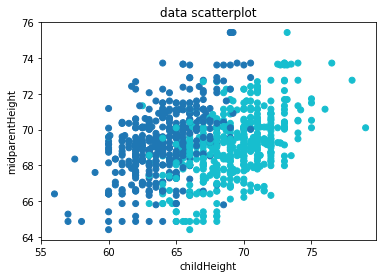

In [7]:
#plot the data scatterplot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.xlabel('childHeight')
plt.ylabel('midparentHeight')
plt.xlim(xx.min(), xx.max())
plt.title('data scatterplot')
plt.show()

#### Calculate the logistic regression classification accuracy of this data

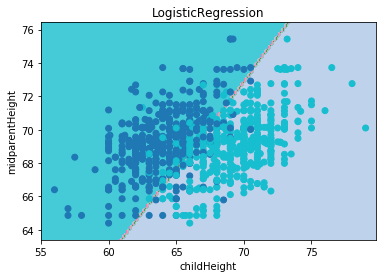

In [10]:
kfold=model_selection.KFold(n_splits=8)
clf=linear_model.LogisticRegression()
results_Logistic=model_selection.cross_val_score(clf,X,y,cv=kfold).mean()
clf.fit(X,y)
Z=clf.predict(X_plot)
Z=Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='tab20_r', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.xlabel('childHeight')
plt.ylabel('midparentHeight')
plt.xlim(xx.min(), xx.max())
plt.title('LogisticRegression')
plt.show()

#### calculate the SVM with RBF kernel accuracy

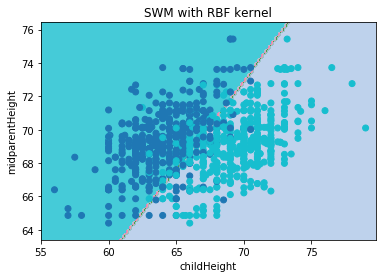

In [15]:
svc=svm.SVC(kernel='rbf')
results_svc=model_selection.cross_val_score(svc,X,y,cv=kfold).mean()
svc.fit(X,y)
Z=svc.predict(X_plot)
Z=Z.reshape(xx.shape)
clf.fit(X,y)
Z=clf.predict(X_plot)
Z=Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='tab20_r', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.xlabel('childHeight')
plt.ylabel('midparentHeight')
plt.xlim(xx.min(), xx.max())
plt.title('SWM with RBF kernel')
plt.show()